We are making clusters out of the embedded data. These clusters represent the data of each individual for categorization purposes

In [1]:
from utils import save_face_list, extract_frames
from face_extraction import process_image, check_face
from facenet_pytorch import MTCNN
import torch
import cv2
from main_extract_faces import process_movies
from main_unsupervised import find_best_number_of_clusters
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import os
import shutil
import plots
import augmentation
import main_embed
import cluster_dataframe
import embed



C:\Users\ningw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Video File Handling Code Explanation

This code snippet is responsible for loading and verifying the accessibility of a specific video file using OpenCV (`cv2`).

In [2]:
#Make sure you are in the right directory
os.getcwd()

'c:\\Users\\ningw\\Desktop\\Assignment3\\KTA3'

In [ ]:
# Input and output file extensions for video files and images
input_extension = '.mp4'
output_extension = '.png'
samples_per_second = 10
padding_x = 10
padding_y = 10
min_confidence = 0.5

# List of movie names for training and testing
MOVIE_TRAINING_LIST = ['New_Kids_ABC', 'New_Kids_Fussballspiel', 
                       'New_Kids_Turbo_Tankstation', 'New_Kids_Nitro_Peter_lemonade_720']
MOVIE_TEST_LIST = ['Test']

# Movie folder (unchanged, retains absolute path)
MOVIE_FOLDER = "C:\\Users\\ningw\\Desktop\\"  # Path where video files are stored

# Define current directory variable
current_directory = os.getcwd()  # Dynamically set to the current working directory

# Define paths using the current directory variable
FACES_FOLDER_TRAINING = f"{current_directory}\\face_folder\\"
FACES_FOLDER_TEST = f"{current_directory}\\face_folder_test\\"

OUTPUT_FOLDER_RESULTS_TRAIN = f"{current_directory}\\results"
RESULTS_NAME_TRAIN = "results.csv"
RESULTS_CSV_TRAIN = f"{OUTPUT_FOLDER_RESULTS_TRAIN}\\results.csv"

OUTPUT_FOLDER_RESULTS_TEST = f"{current_directory}\\results_test"
RESULTS_NAME_TEST = "test_results.csv"
RESULTS_CSV_TEST = f"{OUTPUT_FOLDER_RESULTS_TEST}\\test_results.csv"

KMEANS_OUTPUT_FOLDER = f"{current_directory}\\KMEANS_OUTPUT\\"
CLUSTER_MODEL_PATH = f"{KMEANS_OUTPUT_FOLDER}\\kmeans.pkl"

# List of all directories
directories = [FACES_FOLDER_TRAINING, FACES_FOLDER_TEST, 
               OUTPUT_FOLDER_RESULTS_TRAIN, OUTPUT_FOLDER_RESULTS_TEST, 
               KMEANS_OUTPUT_FOLDER]

# Check if each directory exists, and create it if it doesn't
for path in directories:
    if not os.path.isdir(path):  # Check if the directory exists
        os.makedirs(path, exist_ok=True)  # Create the directory if it doesn't exist
        print(f"Checked/Created directory: {path}")  # Confirm creation of the directory
    else:
        print(f"Directory already exists: {path}")  # Confirm the directory already exists

Directory already exists: c:\Users\ningw\Desktop\Assignment3\KTA3\face_folder\
Directory already exists: c:\Users\ningw\Desktop\Assignment3\KTA3\face_folder_test\
Directory already exists: c:\Users\ningw\Desktop\Assignment3\KTA3\results\
Directory already exists: c:\Users\ningw\Desktop\Assignment3\KTA3\results_test\
Directory already exists: c:\Users\ningw\Desktop\Assignment3\KTA3\KMEANS_OUTPUT\


## Video File Handling Code Explanation

This code snippet is responsible for loading and verifying the accessibility of a specific video file using OpenCV (`cv2`).

In [ ]:
# OpenCV's VideoCapture is initialized with the path to a video file.
cap = cv2.VideoCapture(MOVIE_FOLDER + MOVIE_TRAINING_LIST[1] + '.mp4')  # Construct the full file path using MOVIE_FOLDER and the second video name in the list.

# Check if the video file has been successfully opened.
if not cap.isOpened():  # .isOpened() returns False if the video file cannot be accessed.
    print("Error: Cannot open video file.")  # Print an error message if the video file cannot be opened.
else:
    print("Video file opened successfully!")  # Print a success message if the video file is opened correctly.

# Release the resources associated with the VideoCapture object.
cap.release()  # It's important to release the VideoCapture object to free resources and avoid memory leaks.

Video file opened successfully!


In [5]:
# Call the function using the defined variables
process_movies(
    movie_list=MOVIE_TRAINING_LIST,
    movie_folder=MOVIE_FOLDER,
    faces_folder=FACES_FOLDER_TRAINING,
    input_extension=input_extension,
    output_extension=output_extension,
    samples_per_second=samples_per_second,
    padding_x=padding_x,
    padding_y=padding_y,
    min_confidence=min_confidence
)


Processing: New_Kids_ABC.mp4
Start extracting frames
Successfully captured 204 frames
Saving faces...
Processing: New_Kids_Fussballspiel.mp4
Start extracting frames
Successfully captured 464 frames
Saving faces...
Processing: New_Kids_Turbo_Tankstation.mp4
Start extracting frames
Successfully captured 440 frames
Saving faces...
Processing: New_Kids_Nitro_Peter_lemonade_720.mp4
Start extracting frames
Successfully captured 104 frames
Saving faces...


In [6]:
main_embed.embed(FACES_FOLDER_TRAINING, OUTPUT_FOLDER_RESULTS_TRAIN,RESULTS_NAME_TRAIN)


New_Kids_ABC_0.png
New_Kids_ABC_1.png
New_Kids_ABC_10.png
New_Kids_ABC_100.png
New_Kids_ABC_101.png
New_Kids_ABC_102.png
New_Kids_ABC_103.png
New_Kids_ABC_104.png
New_Kids_ABC_105.png
New_Kids_ABC_106.png
New_Kids_ABC_11.png
New_Kids_ABC_12.png
New_Kids_ABC_13.png
New_Kids_ABC_14.png
New_Kids_ABC_15.png
New_Kids_ABC_16.png
New_Kids_ABC_17.png
New_Kids_ABC_18.png
New_Kids_ABC_19.png
New_Kids_ABC_2.png
New_Kids_ABC_20.png
New_Kids_ABC_21.png
New_Kids_ABC_22.png
New_Kids_ABC_23.png
New_Kids_ABC_24.png
New_Kids_ABC_25.png
New_Kids_ABC_26.png
New_Kids_ABC_27.png
New_Kids_ABC_28.png
New_Kids_ABC_29.png
New_Kids_ABC_3.png
New_Kids_ABC_30.png
New_Kids_ABC_31.png
New_Kids_ABC_32.png
New_Kids_ABC_33.png
New_Kids_ABC_34.png
New_Kids_ABC_35.png
New_Kids_ABC_36.png
New_Kids_ABC_37.png
New_Kids_ABC_38.png
New_Kids_ABC_39.png
New_Kids_ABC_4.png
New_Kids_ABC_40.png
New_Kids_ABC_41.png
New_Kids_ABC_42.png
New_Kids_ABC_43.png
New_Kids_ABC_44.png
New_Kids_ABC_45.png
New_Kids_ABC_46.png
New_Kids_ABC_47.pn

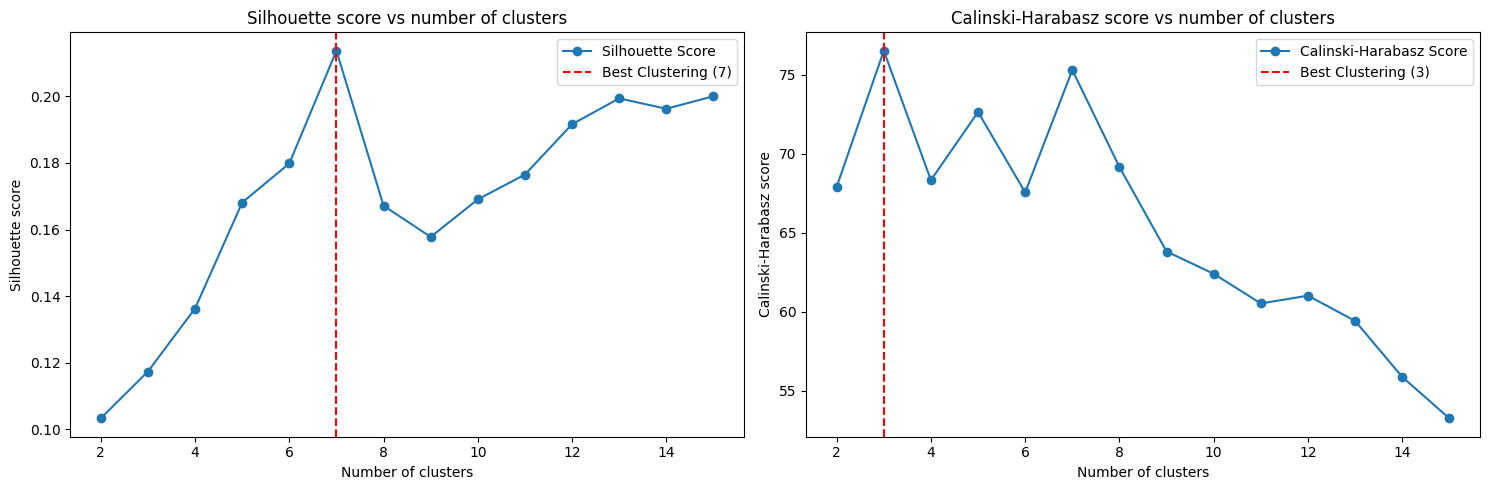

In [7]:
best_clusters_silhouette, best_clusters_calinski = find_best_number_of_clusters(RESULTS_CSV_TRAIN)
cluster_choice = best_clusters_calinski

In [8]:
# Function call for testing movies
process_movies(
    movie_list=MOVIE_TEST_LIST,
    movie_folder=MOVIE_FOLDER,
    faces_folder=FACES_FOLDER_TEST,
    input_extension=input_extension,
    output_extension=output_extension,
    samples_per_second=samples_per_second,
    padding_x=padding_x,
    padding_y=padding_y,
    min_confidence=min_confidence
)


Processing: Test.mp4
Start extracting frames
Successfully captured 521 frames
Saving faces...


In [9]:
main_embed.embed(FACES_FOLDER_TEST,OUTPUT_FOLDER_RESULTS_TEST,RESULTS_NAME_TEST)

Test_0.png
Test_1.png
Test_10.png
Test_100.png
Test_101.png
Test_102.png
Test_103.png
Test_104.png
Test_105.png
Test_106.png
Test_107.png
Test_108.png
Test_109.png
Test_11.png
Test_110.png
Test_111.png
Test_112.png
Test_113.png
Test_114.png
Test_115.png
Test_116.png
Test_117.png
Test_118.png
Test_119.png
Test_12.png
Test_120.png
Test_121.png
Test_122.png
Test_123.png
Test_124.png
Test_125.png
Test_126.png
Test_127.png
Test_128.png
Test_129.png
Test_13.png
Test_130.png
Test_131.png
Test_132.png
Test_133.png
Test_134.png
Test_135.png
Test_136.png
Test_137.png
Test_138.png
Test_139.png
Test_14.png
Test_140.png
Test_141.png
Test_142.png
Test_143.png
Test_144.png
Test_145.png
Test_146.png
Test_147.png
Test_148.png
Test_149.png
Test_15.png
Test_150.png
Test_151.png
Test_152.png
Test_153.png
Test_154.png
Test_155.png
Test_156.png
Test_157.png
Test_158.png
Test_159.png
Test_16.png
Test_160.png
Test_161.png
Test_162.png
Test_163.png
Test_164.png
Test_165.png
Test_166.png
Test_167.png
Test_168.p

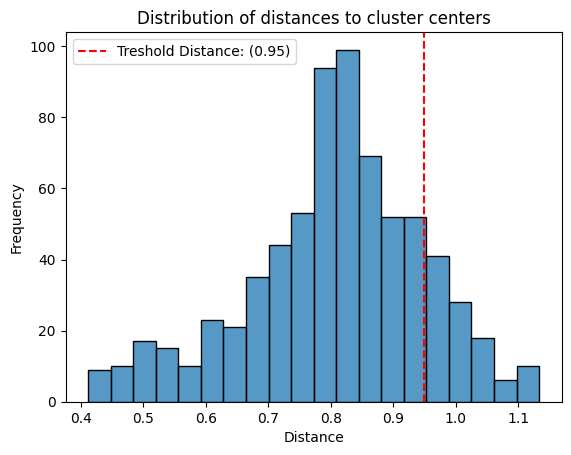

In [10]:
train_embeddings_df = pd.read_csv(RESULTS_CSV_TRAIN)
trains_embeddings = train_embeddings_df.T.values
test_embeddings_df = pd.read_csv(RESULTS_CSV_TEST)
test_embeddings = test_embeddings_df.T.values

kmeans = KMeans(random_state=0, n_clusters=cluster_choice).fit(trains_embeddings)
labels = kmeans.labels_

distances_train = pairwise_distances_argmin_min(trains_embeddings, kmeans.cluster_centers_)[1]
threshold_distance_85 = np.percentile(distances_train, 85)

plots.plot_histplot_percentile(distances_train, threshold_distance_85)

for i, file_name in enumerate(train_embeddings_df.columns):
    if distances_train[i] > threshold_distance_85:
        train_embeddings_df.drop(file_name, axis='columns', inplace=True)
    
trains_embeddings = train_embeddings_df.T.values
kmeans = KMeans(random_state=0, n_clusters=cluster_choice, max_iter=600).fit(trains_embeddings)
labels = kmeans.labels_

for i, file_name in enumerate(train_embeddings_df.columns):
    src_path = os.path.join(FACES_FOLDER_TRAINING, file_name)
    if distances_train[i] > threshold_distance_85:
        dst_path = os.path.join(KMEANS_OUTPUT_FOLDER, 'outliers', file_name)
    else:   
        dst_path = os.path.join(KMEANS_OUTPUT_FOLDER, f'cluster_{labels[i]}', file_name)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    shutil.copy(src_path, dst_path)
    


In [ ]:
thresholds = [0.80, 0.85, 0.9, 0.95]
for threshold in thresholds:
    # Calculate the threshold distance for the current percentile
    threshold_distance = np.percentile(distances_train, threshold * 100)      
    clusterdf = cluster_dataframe.process_videos_to_dataframe(MOVIE_TEST_LIST,MOVIE_FOLDER,kmeans, threshold_distance_85=threshold_distance)
    plots.plot_cluster_presence(clusterdf.sort_index(ascending=False)) 


Processing Test.mp4
Start extracting frames
Successfully captured 521 frames


In [ ]:
#Maakt de augmentations
augmentation.process_images_with_augmentations(FACES_FOLDER_TEST,'AUGMENTED')


In [ ]:
#Maakt van iedere folder met augmentation nieuwe embeddings
for folder_name in os.listdir('AUGMENTED'):
    folder_path = os.path.join('AUGMENTED', folder_name,'')
    if os.path.isdir(folder_path):
        # Dynamically construct paths
        AUGMENTED_FOLDERS = folder_path
        RESULT_NAME_TRAIN = f'embed_{folder_name}.csv'

        # Print paths for debugging
        print(f"Processing folder: {AUGMENTED_FOLDERS}")
        print(f"Output folder: {OUTPUT_FOLDER_RESULTS_TEST}")
        print(f"Result file: {RESULT_NAME_TRAIN}")

        # Call embedding function (example)
        main_embed.embed(AUGMENTED_FOLDERS, OUTPUT_FOLDER_RESULTS_TEST, RESULT_NAME_TRAIN)


In [ ]:
thresholds = [0.80, 0.85, 0.9, 0.95]
for threshold in thresholds:
    # Calculate the threshold distance for the current percentile
    threshold_distance = np.percentile(distances_train, threshold * 100)
    
    # Process the test embeddings with the current threshold
    results_df = cluster_dataframe.process_test_embeddings(
        test_embeddings=test_embeddings,
        test_embeddings_df=test_embeddings_df,
        kmeans=kmeans,
        output_folder='recognition-output',
        face_folder_test='face_folder_test',
        threshold=threshold_distance,
        results_output_path = f'test_results_{threshold}.csv',
    )
    
    # Plot actor presence
    plots.plot_actor_presence(results_df, 'Cluster', cluster_choice,f'test_results_{threshold}.csv')


In [ ]:
#voor ieder embeddingbestand wordt clusterin gedaan, afstand bepaald en frequenty gedemonstreerd clustering distance 85
for file_name in os.listdir(OUTPUT_FOLDER_RESULTS_TEST):
    file_path = os.path.join(OUTPUT_FOLDER_RESULTS_TEST, file_name)
    
    # Check if it's a CSV file
    if file_name.endswith('.csv') and os.path.isfile(file_path):
        print(f"Processing file: {file_name}")
        
        # Read the embeddings from the CSV file
        test_embeddings_df = pd.read_csv(file_path)
        test_embeddings = test_embeddings_df.T.values
        print(test_embeddings_df.columns)
        # Process the embeddings and generate results
        results_df = cluster_dataframe.process_test_embeddings(
            test_embeddings=test_embeddings,
            test_embeddings_df=test_embeddings_df,
            kmeans=kmeans,
            output_folder='recognition-output',
            face_folder_test='face_folder_test',
            threshold=threshold_distance_85,
            results_output_path = file_name,
        )
        
        # Plot actor presence
        plots.plot_actor_presence(results_df, 'Cluster', cluster_choice,file_name)